# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Jimin Lee, Sarah

Student ID: 508714

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class; you might want to also experiemnt with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go. Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [ ]:
# collaborators and sources:
#https://jacksonlab.agronomy.wisc.edu/2016/05/23/15-level-colorblind-friendly-palette/
#https://seaborn.pydata.org/generated/seaborn.catplot.html

# your code here
answer = 'my answer'

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

The data contains information about rides in Boston, Massachusetts and the weather information corresponding to the day of the ride. The data is most likely from Uber and Lyft. The owner of the data does not specify how the data was obtained. There are 693071 examples and 57 features. Approximately half of the data is from Uber and the other half is from Lyft. The features describe each ride by its ride type, location, date, price, and weather-related information such as temperature, precipitation, and humidity. The features have a variety of data types, from integers and floats to objects like string. For example, source, timezone, destination features are in string, while weather-specific informations such as temperature, humidity, and precipIntensity are in float. The only feature with NaN values, however, is the price feature, where only 637976 out of 693071 are non-null. Some of the categorical features have categories that are not very interpretable, such as the 'product_id' which contains strings of letters and numbers in half of the category names. Another interesting is the time range of the data is between November and December, which explains why many weather-specific features such as temperature have small range. The ranges of latitude and longitude features are also small, most likely because the data only applies to rides in Boston, Massachusetts. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('./utility/data/rideshare_kaggle.csv')
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
print(data.shape)
print(data.columns)

(693071, 57)
Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'app

In [5]:
# understand the data types of each feature
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
#data.select_dtypes(include = 'object').describe().transpose()

In [7]:
print(data['cab_type'].value_counts())

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


In [8]:
# unique labels of 'product_id'
print(data['product_id'].value_counts())

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64


In [9]:
# the range of months in the data
print(f"The range of months in the data is from {data['month'].min()} to {data['month'].max()}")

The range of months in the data is from 11 to 12


In [10]:
# the features with range of less than 10 in their respective units:
print([i for i in data.select_dtypes(include = [np.number]).columns if (data[i].max() - data[i].min() < 10)])

['month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'precipIntensity', 'precipProbability', 'humidity', 'visibility', 'cloudCover', 'uvIndex', 'visibility.1', 'moonPhase', 'precipIntensityMax']


In [11]:
# range of latitude and longitude values: 
print(data['latitude'].min(), data['latitude'].max())
print(data['longitude'].min(), data['longitude'].max())

42.2148 42.3661
-71.1054 -71.033


### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [156]:
clean_data = data.dropna()
sum(clean_data.isna().sum(axis=0))

0

We need to handle the NaN values identified in the 'price' feature. Dropping the rows with NaN values is not the most ideal, because they may provide imporant information. However, since the owner did not provide the source of the data or explain how he collected the data, dropping the rows is the best compromise now.

In [136]:
clean_data['datetime']

0         2018-12-16 09:30:07
1         2018-11-27 02:00:23
2         2018-11-28 01:00:22
3         2018-11-30 04:53:02
4         2018-11-29 03:49:20
                 ...         
693065    2018-12-01 23:53:05
693066    2018-12-01 23:53:05
693067    2018-12-01 23:53:05
693069    2018-12-01 23:53:05
693070    2018-12-01 23:53:05
Name: datetime, Length: 637976, dtype: object

In [59]:
len(clean_data['datetime'].unique())

31350

In [158]:
datetime = pd.to_datetime(clean_data['datetime'])
date = datetime.dt.strftime('%m-%d')
#clean_data.insert(loc = 0, column = 'date', value = datetime)
clean_data['date']

0        2018-12-16 09:30:07
1        2018-11-27 02:00:23
2        2018-11-28 01:00:22
3        2018-11-30 04:53:02
4        2018-11-29 03:49:20
                 ...        
693065   2018-12-01 23:53:05
693066   2018-12-01 23:53:05
693067   2018-12-01 23:53:05
693069   2018-12-01 23:53:05
693070   2018-12-01 23:53:05
Name: date, Length: 637976, dtype: datetime64[ns]

In [160]:
day_of_week = pd.Series(datetime.dt.day_name())
#clean_data.insert(loc = 0, column = 'day_week', value = day_of_week)
clean_data['day_week']

0            Sunday
1           Tuesday
2         Wednesday
3            Friday
4          Thursday
            ...    
693065     Saturday
693066     Saturday
693067     Saturday
693069     Saturday
693070     Saturday
Name: day_week, Length: 637976, dtype: object

The original datetime feature has 31350 unique values, which will be an obstacle when plotting time series plot. Therefore, we converted the values in the datetime feature to the 'datetime' data type in pandas and stripped the values to month and day, since the year is the same among all values. We also converted the dates to the days of the week and saved it as a column 'day_week'. 

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

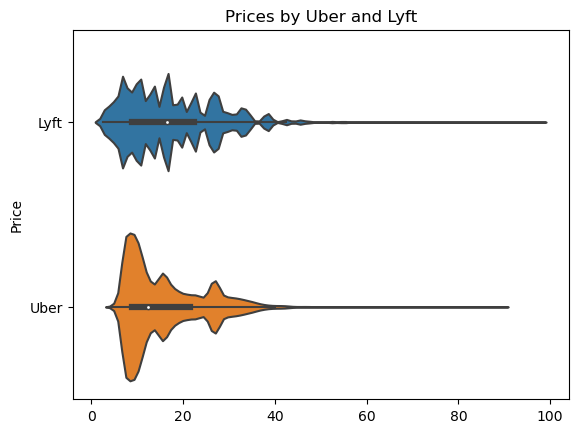

In [168]:
sns.violinplot(data = clean_data, x = 'price', y = 'cab_type')
plt.title("Prices by Uber and Lyft")
plt.xlabel("")
plt.ylabel("Price")
plt.show()

In [14]:
uber_median = clean_data[clean_data['cab_type'] == 'Uber']['price'].median()
lyft_median = clean_data[clean_data['cab_type'] == 'Lyft']['price'].median()
lyft_median - uber_median

4.0

In [15]:
uber_mean = clean_data[clean_data['cab_type'] == 'Uber']['price'].mean()
lyft_mean = clean_data[clean_data['cab_type'] == 'Lyft']['price'].mean()
lyft_mean - uber_mean

1.5560529581068039

The distribution of prices in Uber and Lyft are similar. Their median values only differ by 4 dollars and their mean values have difference of less than 2 dollars. Although they are small differences, Lyft has both a higher median and higher mean price vaue. This is because as the violin plot shows, the price distribution of Uber rides are heavily clustered on the lower end, while the price distribution of Lyft rides are more spread out. The plot also shows that Lyft rides have a greater range. Our initial assumption is that many Lyft rides traveled more distances, since intuitively, distance would correlate with prices. There are many features in the data, meaning that the distribution of prices is influenced by various factors. Therefore, the overall distribution of price features provide some insight, but not much. We need to splice the data into more features and look into their relationship with other features. 

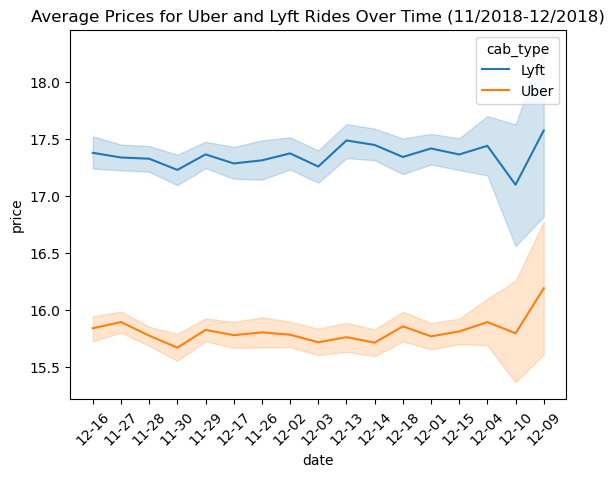

In [68]:
sns.lineplot(x = 'date', y = 'price', hue = 'cab_type', data = clean_data)
plt.xticks(rotation = 45)
plt.title("Average Prices for Uber and Lyft Rides Over Time (11/2018-12/2018)")
plt.show()

There does not appear to be significant relationship between the price and the time period. As denoted above, the mean prices of Uber and Lyft rides are very close, and the mean values did not change very much over time. The increasing trend near the start of December is reflected both by the Uber and Lyft distributions. 

We then turned to the 'source' feature and examined the relative proportion of each sources in the Uber and Lyft prices.

In [203]:
color_blind_free = ["#000000","#ff6db6","#ffb6db","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#924900","#db6d00","#24ff24","#ffff6d"]
source_colors = dict(zip(clean_data['source'].unique(), color_blind_free))

We first chose color blind friendly set of colors and mapped them to each source in data, so that we can plot two density plots, each representitive of Uber and Lyft, side by side with single legend.

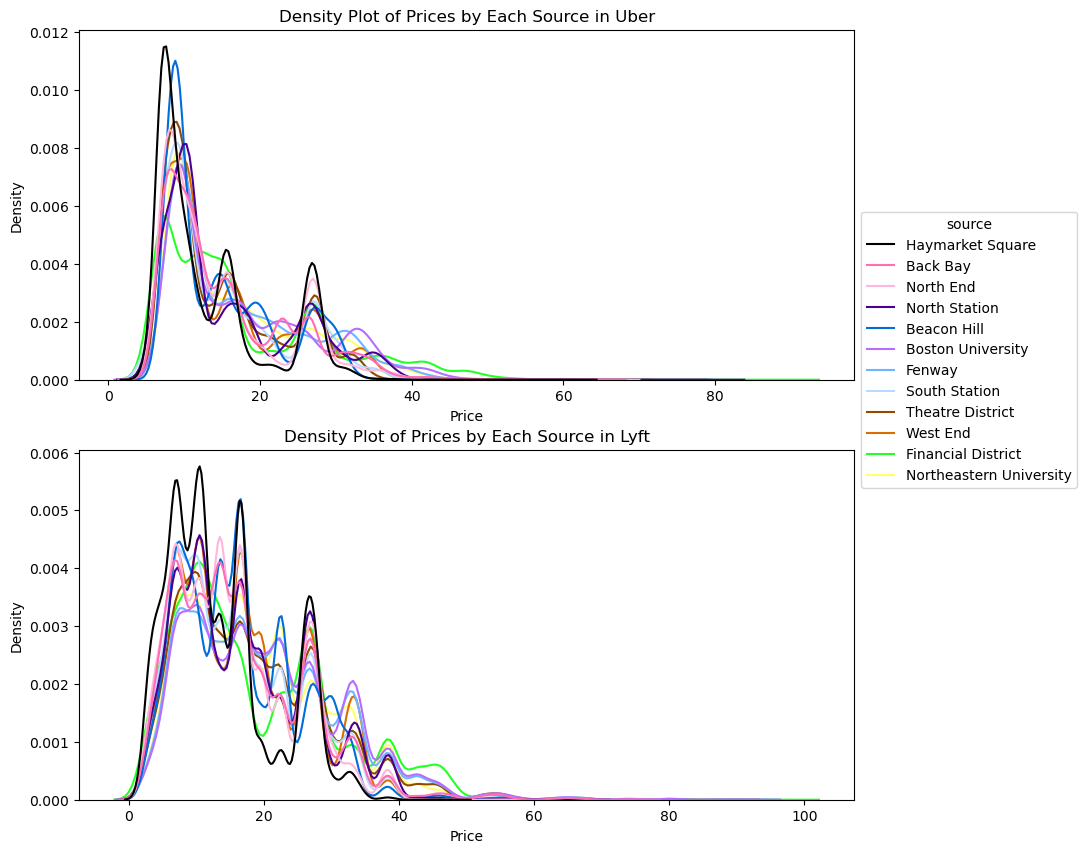

In [204]:
plt.figure(figsize = (10,10))
plt.subplot(211)
uber_specific = clean_data[clean_data['cab_type']=='Uber']
uber_deplot = sns.kdeplot(data = uber_specific, x = 'price', hue = 'source', palette = source_colors, hue_order = clean_data['source'].unique())
plt.title("Density Plot of Prices by Each Source in Uber")
plt.xlabel("Price")
plt.ylabel("Density")
sns.move_legend(uber_deplot, "upper left", bbox_to_anchor=(1, 0.5))


plt.subplot(212)
lyft_specific = clean_data[clean_data['cab_type']=='Lyft']
sns.kdeplot(data = lyft_specific, x = 'price', hue = 'source', palette = source_colors, hue_order = clean_data['source'].unique(), legend = False)
plt.title("Density Plot of Prices by Each Source in Lyft")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

There is not much variation on the distribution of prices by each source. They both generally follow a unimodal distribution that is skewed to the right. This aligns with the overall pattern of the price distributions in Uber and Lyft, as shown by the violin plot before. However, the density plot of Uber prices in each source does appear to have more values concentrated at a common value in the lower end than the density plot of Lyft prices in each source does. To some extent, this explains why the price distribution of appeared to be more spread-out than the price distribution of Uber did in the violin plot above. The density plot of Lyft prices has multiple peaks of similar proportion across all sources, while the density plot of Uber prices has a nearly unimodal peak between 0 and 20 dollars across all sources. When adding the prices across all sources to get the overall distribution, the price distribution of Uber will inevitably become more significantly skewed to the right, while with multiple peaks in Lyft, its price distribution will not appear as skewed, but rather more spread out.  

The black line represents the Haymarket Square as the source. It is the line that has the greatest density in both density plots of Uber and Lyft prices. Interestingly, they both have a peak at a similar value, which made us curious if the peaks represent  repetitive trips between Haymarket Square and a few specific destinations. We computed the frequencies of destinations for rides with Haymarket Square as the source with respect to the cab_type of Uber and Lyft

In [161]:
haymarket = clean_data[clean_data['source'] == 'Haymarket Square']

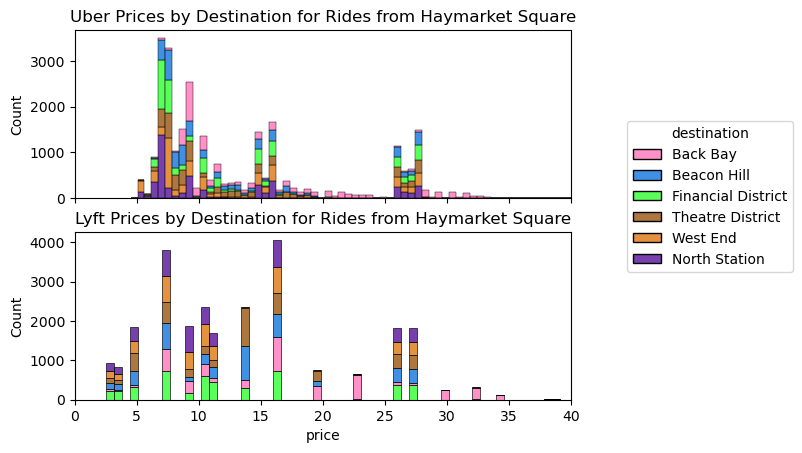

In [205]:
plt.subplot(211)
plt.title("Uber Prices by Destination for Rides from Haymarket Square")
haymarket_uber = sns.histplot(data = haymarket[haymarket['cab_type']=='Uber'], x = 'price', hue = 'destination', multiple="stack", palette = source_colors)
plt.xlim((0, 40))
sns.move_legend(haymarket_uber, "upper left", bbox_to_anchor=(1.1, 0.5))
plt.tick_params(labelbottom = False)
plt.xlabel("")

plt.subplot(212)
plt.title("Lyft Prices by Destination for Rides from Haymarket Square")
sns.histplot(data = haymarket[haymarket['cab_type']=='Lyft'], x = 'price', hue = 'destination', multiple="stack", legend = False, palette = source_colors)
plt.xlim((0, 40))
plt.show()

The result shows that the proportion of each destination in the peaks are approximately uniform in Lyft, while in Uber, certain destinations are overrepresented. This may suggest that the sample has customers who consistently take Uber when traveling from Haymarket Square to North Station or Financial District. Also, the Lyft prices are not as continuously distributed as the Uber prices. 

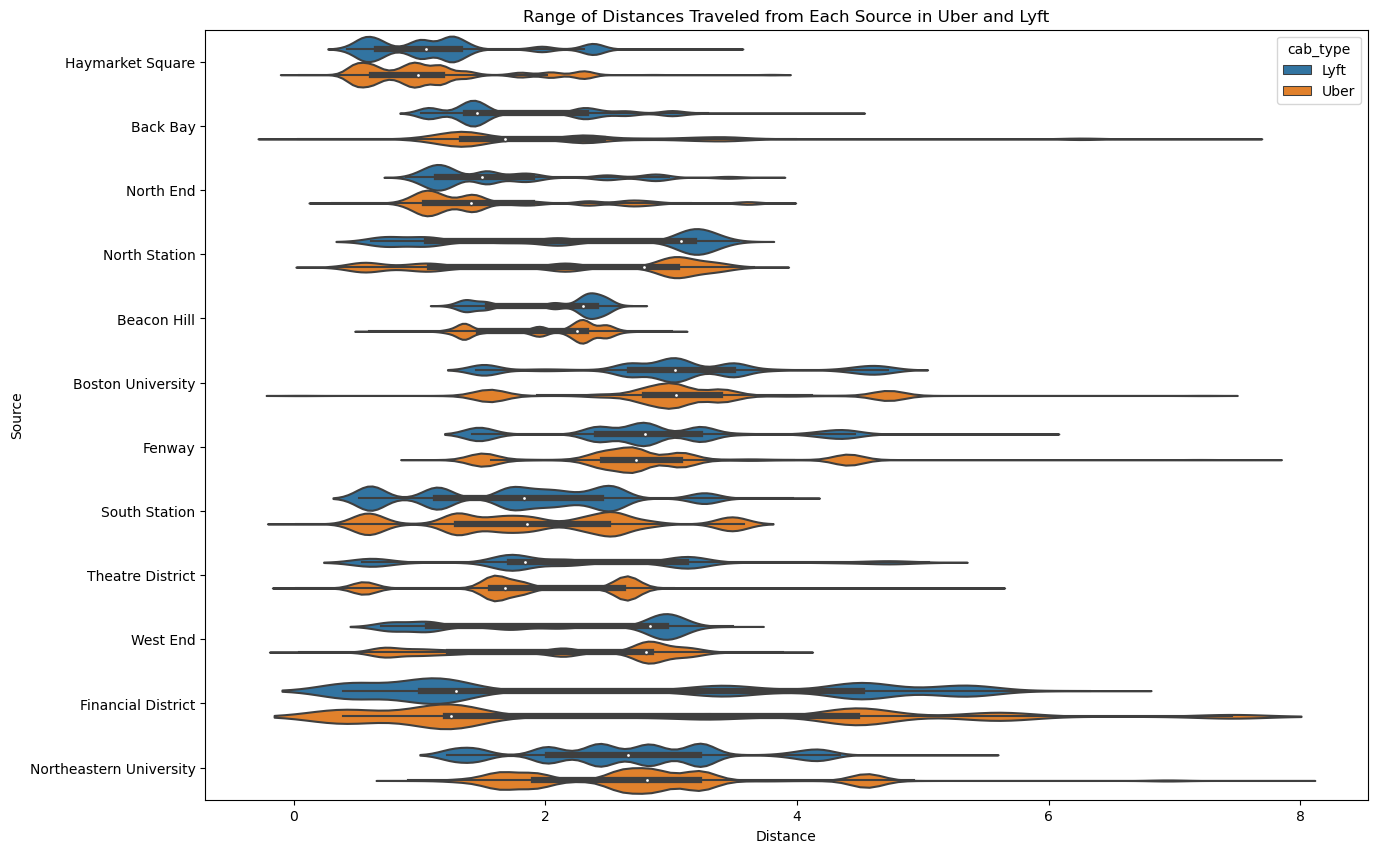

In [165]:
plt.figure(figsize = (15, 10))
sns.violinplot(data = clean_data, y = 'source', x = 'distance', hue = 'cab_type')
plt.title("Range of Distances Traveled from Each Source in Uber and Lyft")
plt.xlabel("Distance")
plt.ylabel("Source")
plt.show()

The horizontal violin plots of the distances traveled from each source reveal the difference in range of distances traveled in Uber and Lyft. For example, a wider range of distances were traveled from most predominantly Back Bay, Boston University, Financial District, abd Northeastern University. While it is intuitive that price and distance correlate with each other, it is interesting how rides that travel longer distances are more represented as Uber rides than as Lyft rides.

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

**Answer here:** 

From the steps above, we found hints that the Ubers may be preferred over Lyfts in certain circumstances. For example, while the proportion of destinations, or initial place of travel, was nearly equally distributed in Lyfts, in the distribution of Uber prices, there were two destinations overrepresented at its peaks, suggesting that there was a preference for Uber, possibly by the same group of people at most instances, when purchasing the ride at that price of about 7 dollars. Also, the Uber rides, categorized by each source, had longer ranges than Lyft rides, which suggests that Uber rides may be preferred when traveling longer distances, or possibly that people who travel longer distances travel Uber in Boston. 

Our question asks if Uber is preferred over Lyft when travelling long distances, and if so, why. 

We hypothesize that Uber is a more cost-effective option when traveling longer distances than Lyft, so Uber is preferred over Lyft when travelling long distances.

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

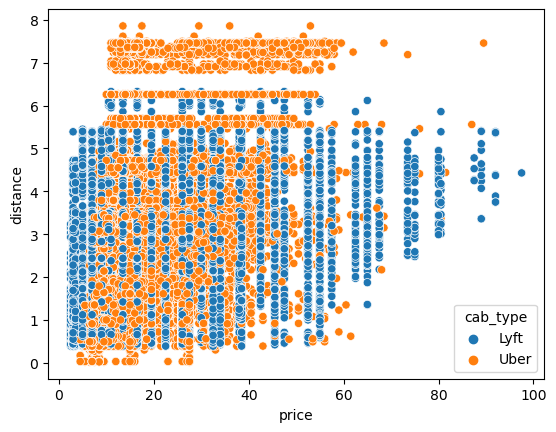

In [169]:
sns.scatterplot(data = clean_data, x = 'price', y = 'distance', hue = 'cab_type')
plt.show()

We first graphed the scatter plot of price values versus distance. Interestingly, the Uber and Lyft prices seemed to follow two distinguished patterns. The Lyft prices were very vertically distributed across range of distances at each price values and again appeared almost discrete, compared to Uber prices, which were very clustered and continously distributed. However, at greater distances, the Uber prices were horizontal across a range of prices. 

We then separated the data into Lyft-specific and Uber-specific data to examine them individually at a closer angle.

In [245]:
lyft_data = clean_data[clean_data['cab_type'] == 'Lyft']
uber_data = clean_data[clean_data['cab_type'] == 'Uber']

We then performed a similar process of assigning color blind friendly colors to different ride types in Lyft and Uber. We assigned same color hex codes to rides with similar price range to make the comparison easier.

In [198]:
lyft_name_colors = {'Shared': "#b6dbff",
                    'Lux': "#8B8000",
                    'Lyft':"#6db6ff",
                    'Lux Black XL':"#ff6db6",
                    'Lyft XL':"#b66dff",
                    'Lux Black':"#000000"}

uber_name_colors = {'UberPool': "#b6dbff",
                    'UberXL': "#8B8000",
                    'UberX':"#6db6ff",
                    'Black SUV':"#ff6db6",
                    'WAV':"#b66dff",
                    'Black':"#000000"}

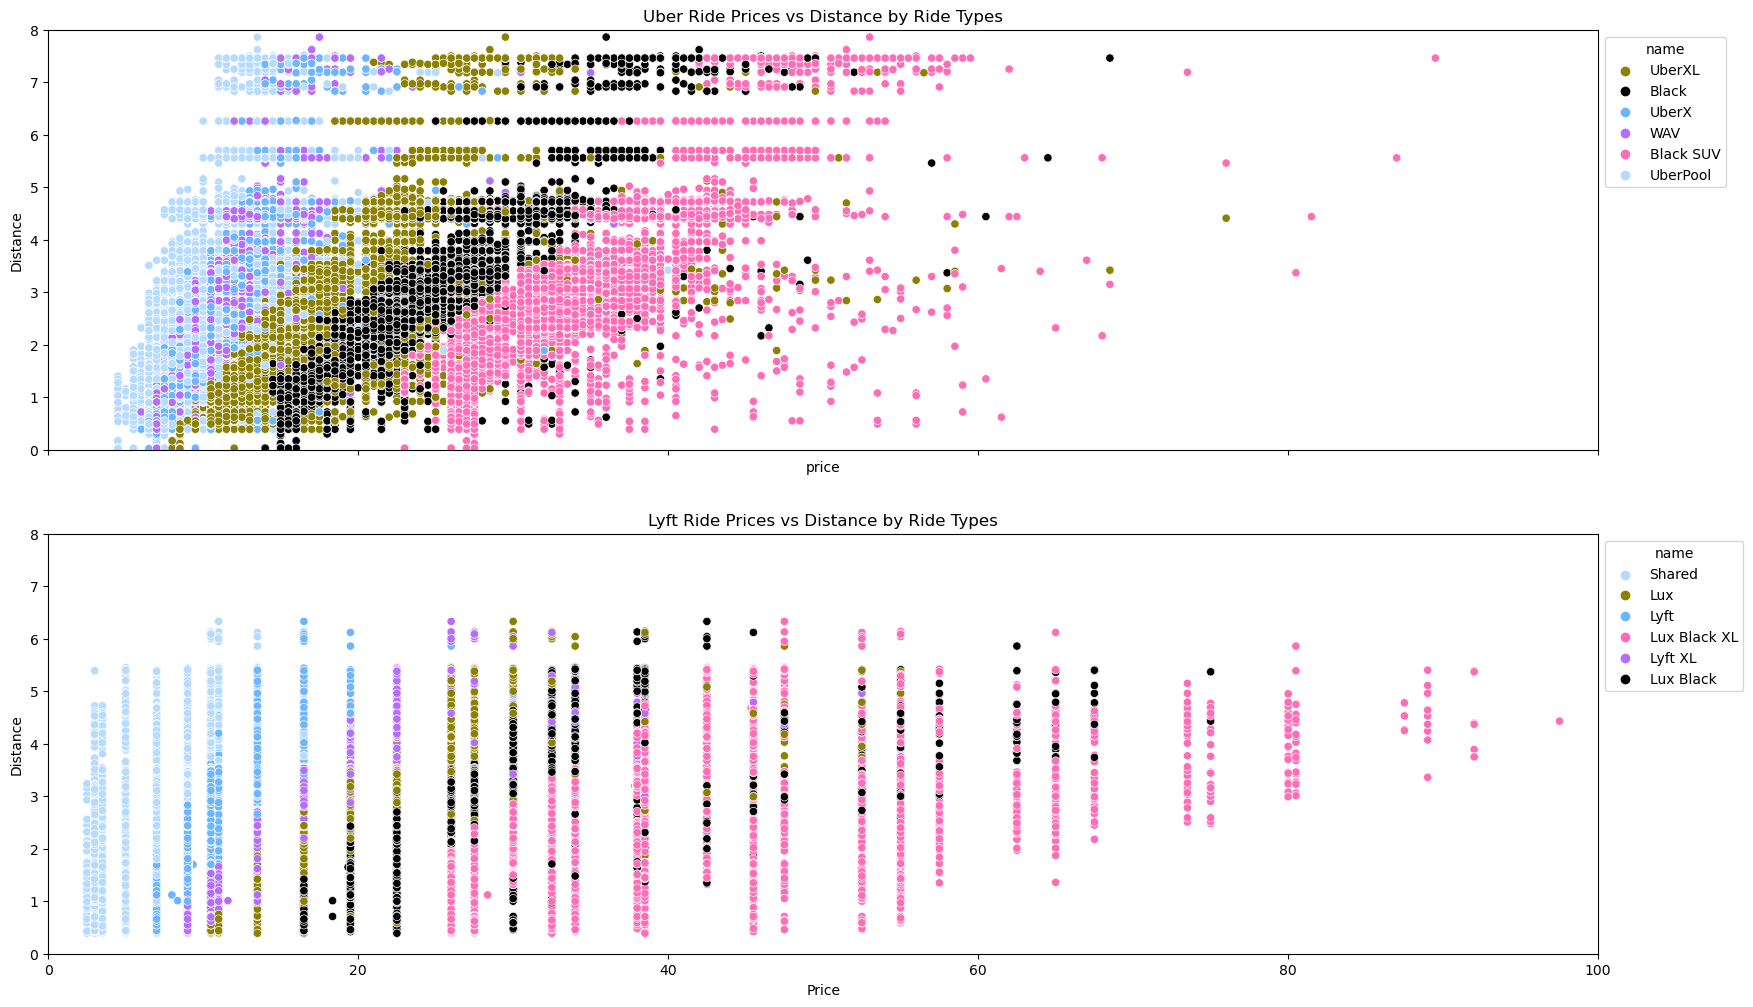

In [237]:
plt.figure(figsize = (20,12))
plt.subplot(211)
uber = sns.scatterplot(data = uber_data, x = 'price', y = 'distance', hue = 'name', palette = uber_name_colors)
sns.move_legend(uber, "upper left", bbox_to_anchor=(1, 1))
plt.title("Uber Ride Prices vs Distance by Ride Types")
plt.tick_params(labelbottom = False)
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))

plt.subplot(212)
lyft = sns.scatterplot(data = lyft_data, x = 'price', y = 'distance', hue = 'name', palette= lyft_name_colors)
sns.move_legend(lyft, "upper left", bbox_to_anchor=(1, 1))
plt.title("Lyft Ride Prices vs Distance by Ride Types")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))

plt.show()

There appears to be a clear pattern between different ride types. The relationships between price and distance for each ride type in Uber and Lyft appear to be closely linear and for ride types that can accomodate more people, they seem to have steeper slopes. As acknowledged from before, there are only Ubers for trips with distance greater than 7 and Lyft has more trips with prices greater than 60. The values are evenly distributed between different ranges of distances and prices in Ubers, but in Lyfts, there are select values of prices in the distribution. 

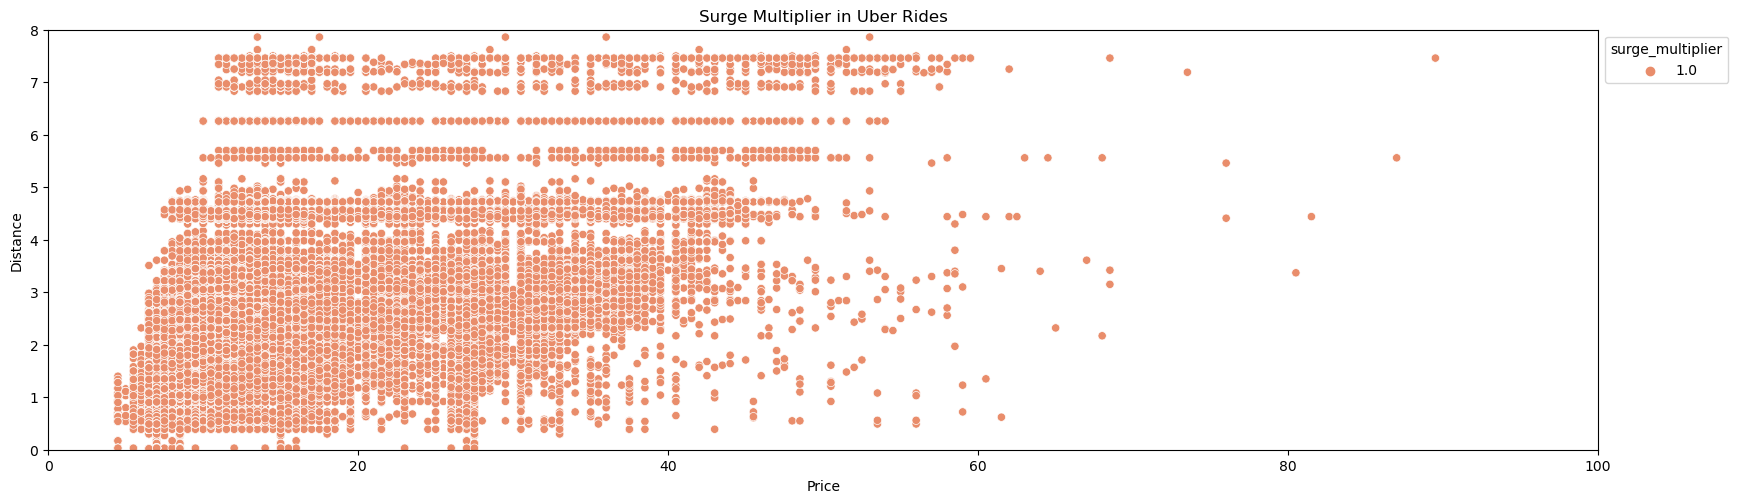

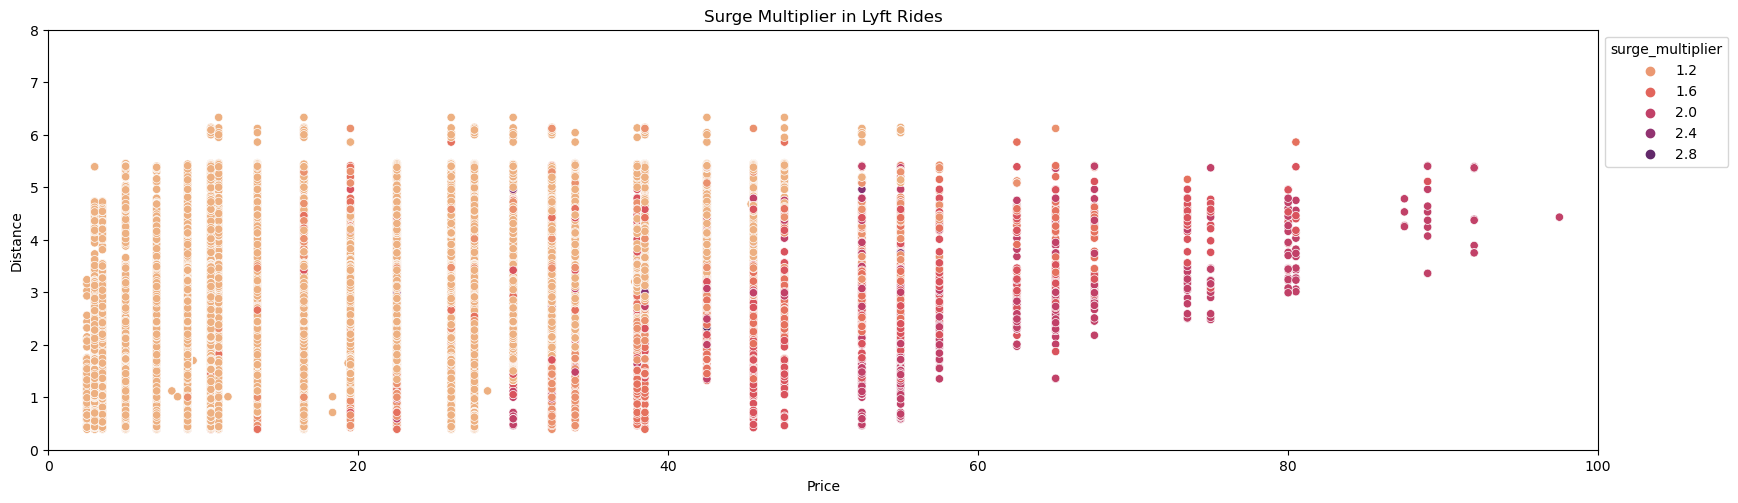

In [227]:
plt.figure(figsize = (20,12))

plt.subplot(211)
uber_surge = sns.scatterplot(data = uber_data, x = 'price', y = 'distance', hue = 'surge_multiplier', palette = ["#e98d6b"])
sns.move_legend(uber_surge, "upper left", bbox_to_anchor=(1, 1))
plt.title("Surge Multiplier in Uber Rides")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))
plt.show()

plt.figure(figsize = (20,12))
plt.subplot(211)
lyft_surge = sns.scatterplot(data = lyft_data, x = 'price', y = 'distance', hue = 'surge_multiplier', palette= "flare")
sns.move_legend(lyft_surge, "upper left", bbox_to_anchor=(1, 1))
plt.title("Surge Multiplier in Lyft Rides")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))
plt.show()

To better understand the difference in distribution of prices, we looked at the surge multiplier. Uber rides do not have varying surge multiplier values, while Lyft rides have a number of different surge multiplier values. Interestingly, the right-skewed values of the prices in Lyft distribution have surge multiplier values of 2.0 or greater. The surge multiplier seems to be applied with greater magnitude for 'Lux Black XL' rides and the surge multiplier seems to account for the big discrepancy in the price distribution between Uber and Lyft

We then separated the data by the ride types and graphed the regression models of Uber and Lyft prices over the range of distances to understand how Uber and Lyft prices will change with respect to distance. This allows us to go above the collected data sample, since none of the Lyft rides travelled distance more than 7. 

Because the ride types of Uber and Lyft are different, we assigned common names, the same way we assigned them common colors in the scatter plot above. We grouped the ride types by their similarity in price distribution and functionality, so UberPool with Shared, UberX with Lyft, UberXL with Lux, WAV with Lyft XL, Black with Lux Black, and Black SUV with Lux Black XL. 

In [ ]:
 WAV LyftXL Lux UberXL Lux Black Black Lux Black XL Black SUV

In [272]:
uber_ride_type = uber_data['name'].map({'UberPool':'Type 1', 'UberX': 'Type 2',  'WAV': 'Type 3', 'UberXL': 'Type 4', 'Black':'Type 5', 'Black SUV':'Type 6'})
#uber_data.insert(loc = 0, column = 'ride_type', value = uber_ride_type)

lyft_ride_type = lyft_data['name'].map({'Shared':'Type 1', 'Lyft': 'Type 2', 'Lyft XL': 'Type 3', 'Lux': 'Type 4', 'Lux Black':'Type 5', 'Lux Black XL':'Type 6'})
#lyft_data.insert(loc = 0, column = 'ride_type', value = lyft_ride_type)

In [273]:
combined_data = pd.concat([uber_data,lyft_data])
column_order = [f'Type {i}' for i in range(1,7)]

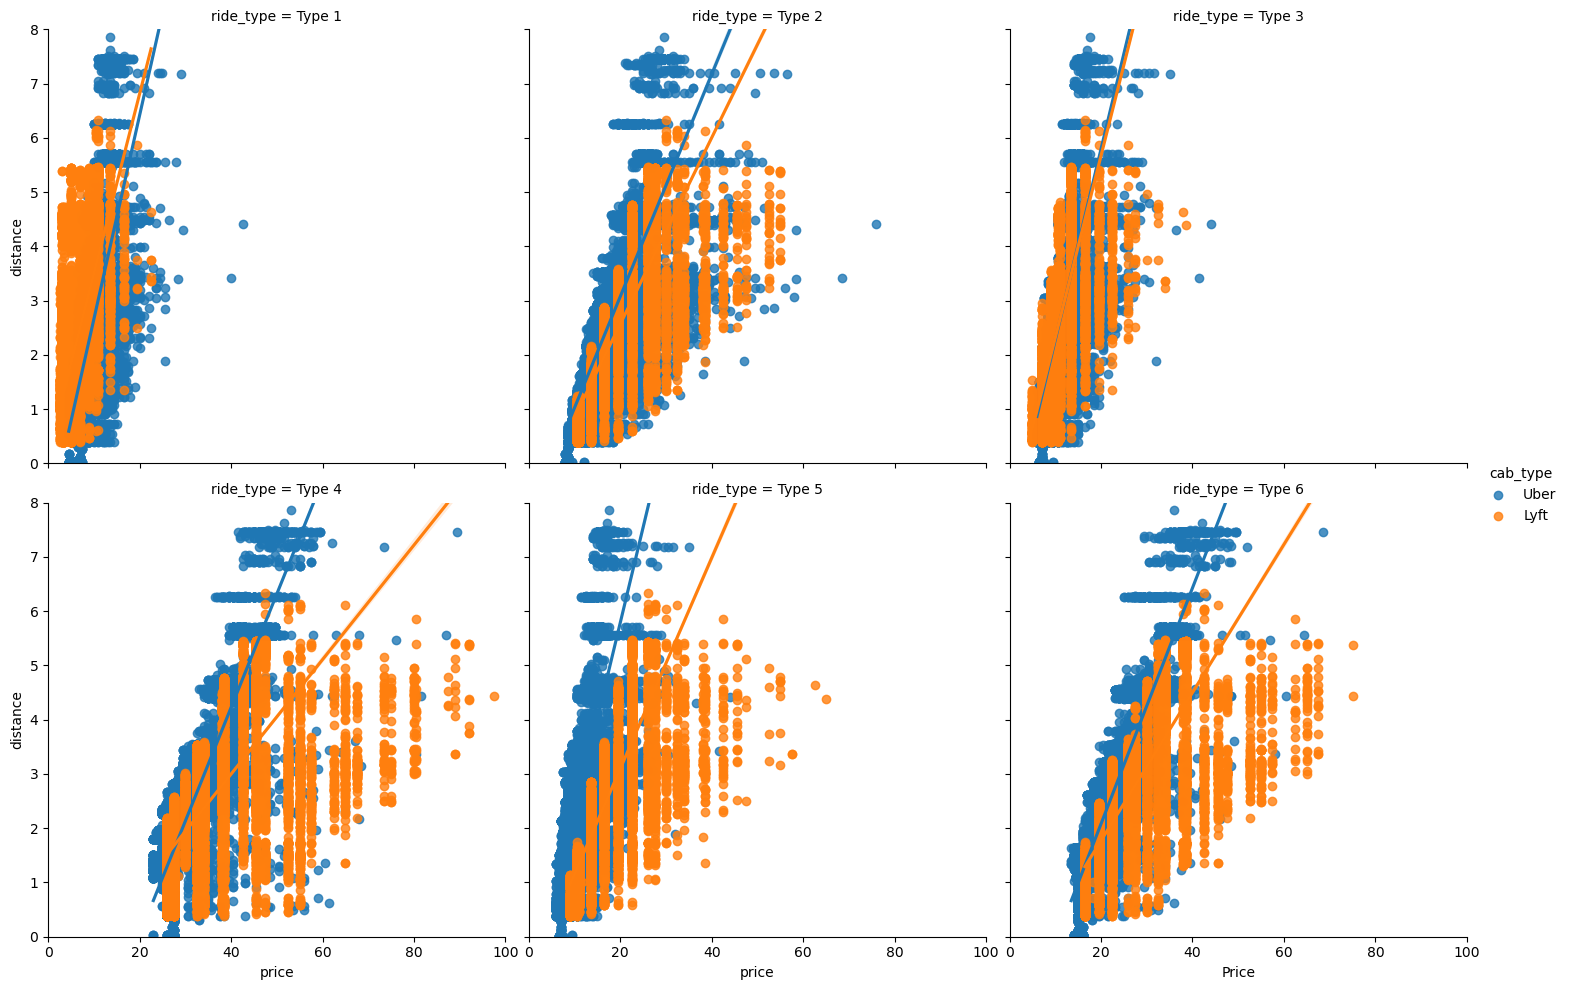

In [274]:
sns.lmplot(data = combined_data, x = 'price', y = 'distance', hue = 'cab_type', col = 'ride_type', col_order = column_order, height = 5, col_wrap = 3)
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xlim((0, 100))
plt.ylim((0, 8))
plt.show()

The linear regression model plotted above confirms that in general, as the ride type increases in size and improves in functionality, the slope of the price vs distance distribution gets steeper, especially Lyft with its surge multiplier policy. Therefore, the linear regression model predicts that as distance increases, the price charged by Lyft increases more than the price charged by Uber increases. 

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

**Answer here:**

...

According to the evidences we found, the price would be more expensive for Lyft than Uber when travelling long distances.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

**Answer here:** (feel free to make multiple cells!)

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

**Answer here:** (feel free to make multiple cells!)

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. **Be sure to add your partner to the submission as well**.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.